<a href="https://colab.research.google.com/github/bgohrani/Sigmoid_Neuron/blob/main/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sigmoid Neuron

The sigmoid neuron is the basic building unit of a neural network used in learning. Here, the function is slightly more complex and the output it provides is continuous, as compared to the discrete 0 or 1 given by the MP neuron or the perceptron. Consequently, the output of the sigmoid neuron may be used for regression as values lie between 0 and 1 or classfication too, by setting an appropriate threshold value. Similar to the preceptron, the sigmoid neuron takes real valued inputs and also has a well-defined training or learning algorithm, slightly more complex.

The input output relationship in the Sigmoid neuron with parameters w & b is given by:

###$y = \frac{1}{1 + {e}^{-(w.x+b)}}$

###We will see plotting the Sigmoid neuron first

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from tqdm import tqdm_notebook
import math
from mpl_toolkits.mplot3d import Axes3D
sns.set()

#Importing essential Libraries

In [12]:
#Just directly substituting values into the sigmoid equation

def sigmoid(w,b,x):
  y = 1/(1+np.exp(-((w*x)+b)))
  return y


In [13]:
ans1 = sigmoid(0.8,0.1,3)
print(ans1)

0.9241418199787566


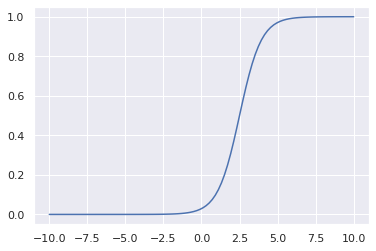

In [14]:
#Alongside this w and b, we have added a code snippet
#This lets us select the values with the help of a slider
#Increase in b, left shift of positive w curve
#Increase in b, right shift of negative w curve 

w = 1.4 #@param {type: "slider", min: -2, max: 2, step:0.1}
b = -3.5 #@param {type: "slider", min: -10, max: 10, step:0.1}

X= np.linspace(-10,10,100) 
Y = sigmoid(w,b,X)

plt.plot(X,Y)
plt.show()

We can also use the sigmoid neuron and matplotlib to make a 3d plot, wherein we have 2 inputs, x1 and x2 and their corresponding weights w1 and w2 alongside a threshold value b. We can start off by writing a function for the same.
This relation can be seen by:

###$y_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}} $

In [15]:
#Here is the function
def sigmoid3d(x1,x2,w1,w2,b):
  y = 1/(1+ np.exp(-(w1*x1 + w2*x2 + b)))
  return y

In [8]:
sigmoid3d(2,3,0.8,0.5,0)

0.9568927450589139

In [16]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
XX1, XX2 = np.meshgrid(X1,X2)
Y= sigmoid3d(XX1,XX2,0.5,0.5,0)
#Here we added the meshgrid code to make sure each value of X1 is taken with X2 
#This will give us the proper surface instead of just a 3D line 


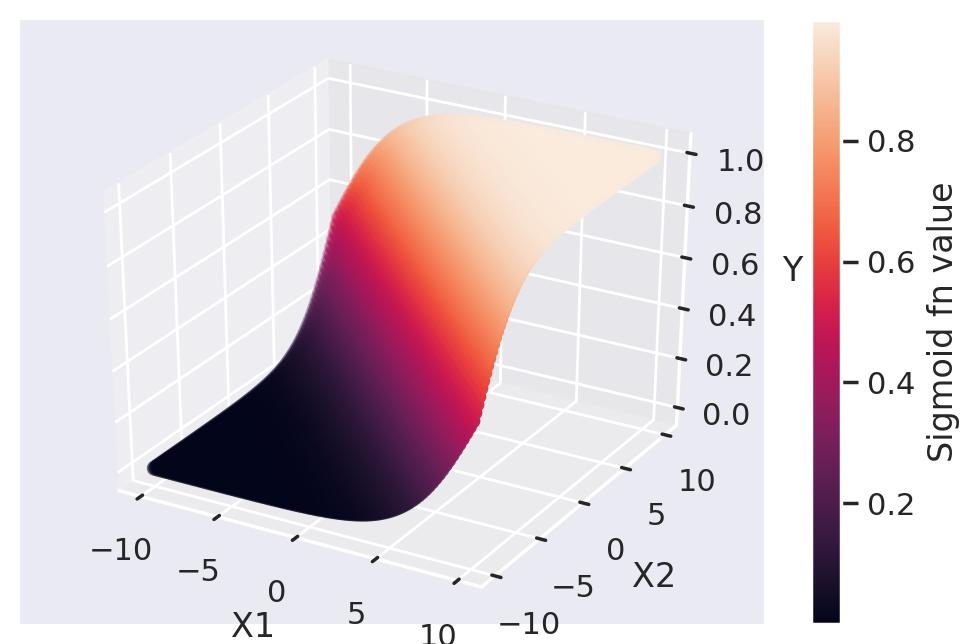

In [18]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Y)
markpts = ax.scatter(XX1,XX2,Y,c=Y)
cbar = plt.colorbar(markpts)
cbar.set_label("Sigmoid fn value")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
#ax.view_init(30,0)
plt.show()

#Subplot code added to make the figure 3D
#After plotting we add the colour bar to distinguish the values of Y
#There's some discrepancy here with what the instructor teaches, need to recheck

In [20]:
import matplotlib.colors

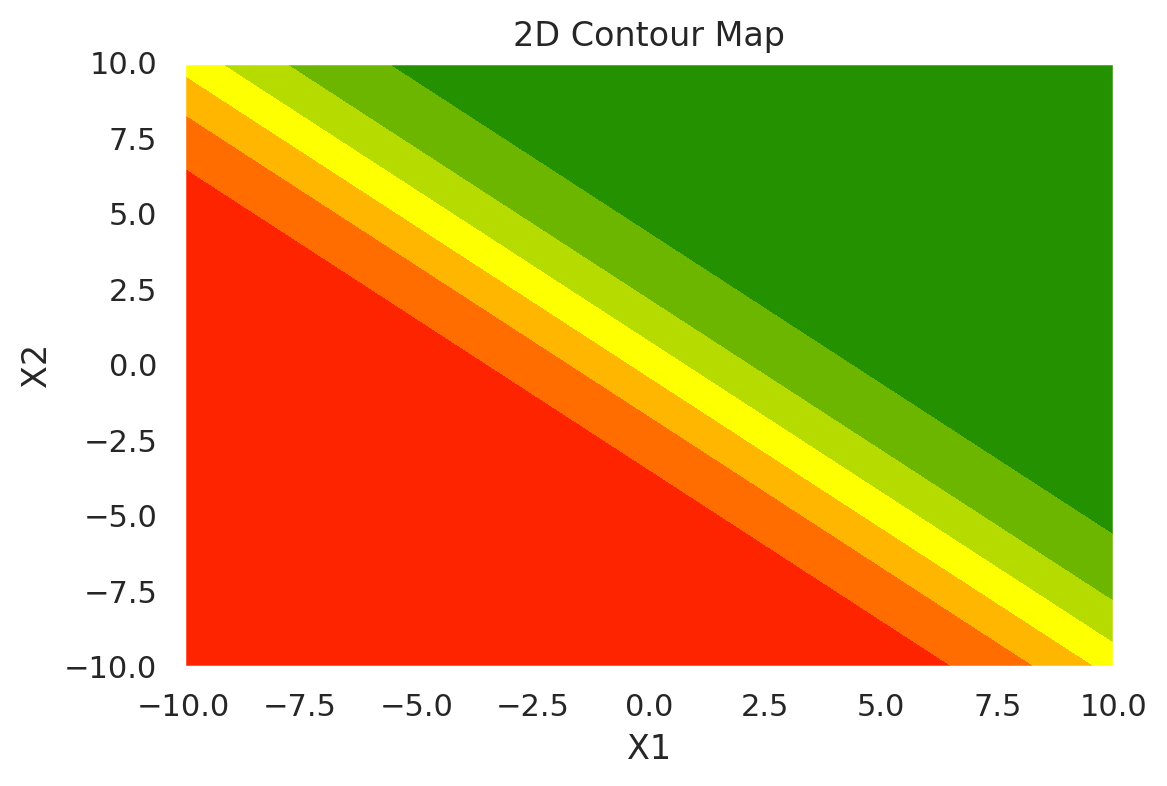

In [22]:
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.figure(dpi=200)
plt.contourf(XX1,XX2,Y,cmap = cmap1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Contour Map')
plt.show()
#contourf is a way to visualize 3 parameters in 2d, the different colours show y
#The first line is to create a proper colour map to be used in the list 
#Try to improve gradient

#Plotting the Loss function
Here we'll take some value of w,b and an array of random x values, calculate the sigmoid function and then use a brute force search on w and b and try to reach our selected values. We will also define a loss function to be used here 

$Loss_{w_{given},b_{given}} = \sum_{}^{n}(y- \hat{y})^2$

In [24]:
w = 0.5
b = 0.25
X = np.random.random(20)*20 -10
Y = sigmoid(w,b,X)
#Taking random x and selecting a w and b value
#Finding out Y to act as Y_train


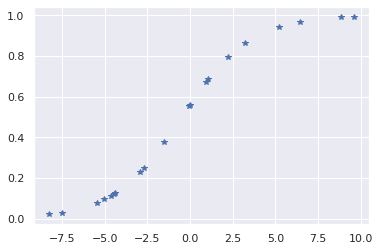

In [25]:
plt.plot(X,Y,'*')
plt.show()
#Plotting the values here 

In [26]:
def find_loss(X,Y,w_given,b_given):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y - sigmoid(w_given,b_given,x))**2
  return loss

#Defining the loss function, iterating over complete X and Y for given w,b
#Used Squared error loss here 


In [27]:
W = np.linspace(0,1,100)
B = np.linspace(-1,1,100)

WW , BB = np.meshgrid(W,B)
Loss = np.zeros([WW.shape[0],WW.shape[1]])
#To do Brute force search, we must take some range to begin with
#We take mesh grid to take each combination of w and b 

In [28]:
#Calculating loss for each combination of w and b
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = find_loss(X,Y,WW[i,j],BB[i,j])


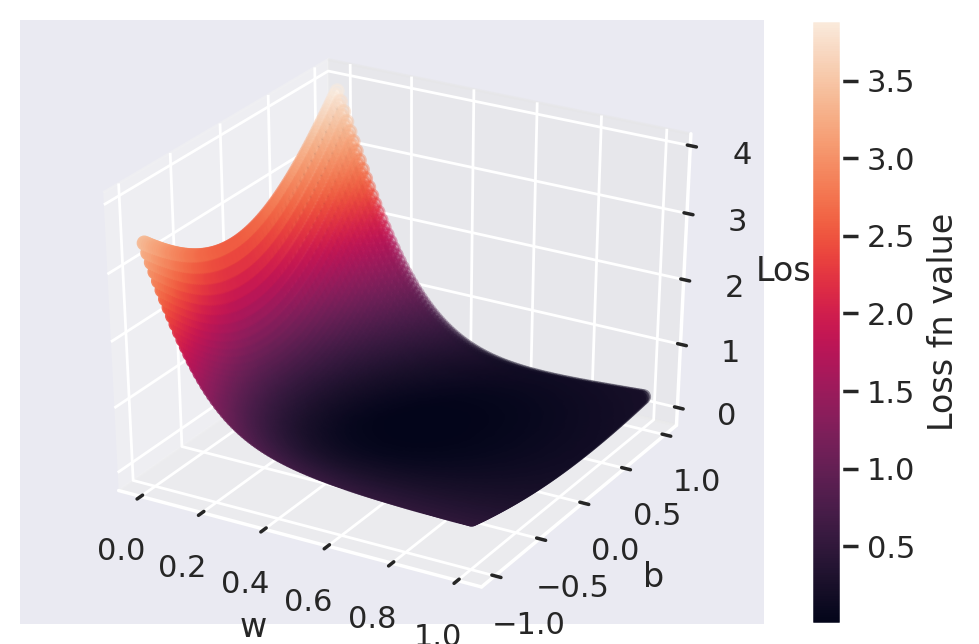

In [30]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB,Loss)
markpts = ax.scatter(WW,BB,Loss,c=Loss)
cbar = plt.colorbar(markpts)
cbar.set_label("Loss fn value")
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
#ax.view_init(30,270)
plt.show()

#Similar rules to plotting as before

In [31]:
for i in range(Loss.shape[0]):
  for j in range(Loss.shape[1]):
    if Loss[i,j] == np.min(Loss):
      print('the value of w & b for which loss is minimum is ', WW[i,j],'and ', BB[i,j])
      break

#Here we will just loop through our calculated values of Loss
#We find indices of minimum value of Loss
#Use those indices to return optimal w and b

the value of w & b for which loss is minimum is  0.5050505050505051 and  0.2525252525252526


#Class for Sigmoid Neuron
Here we'll write a class for the sigmoid neuron to be used in training. The learning is done by the specific gradient descent algorithm used for the sigmoid neuron wherein the loss function is minimized when w and b change in a direction opposite to the gradient. The gradient to be used in the code was specified for w and b to be:

$grad_w = \sum{}^{N}(\hat{y} - y)*(\hat{y} - 1)*\hat{y}*x$

$grad_b = \sum{}^{N}(\hat{y} - y)*(\hat{y} - 1)*\hat{y}$

we will include this in the train function to use for given X and Y


In [32]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None 
    self.b = None
  
  def model(self,x):
    y = 1/(1+np.exp(-(np.dot(self.w,x) + self.b)))
    return y
  
  def predict(self,X):
    Y_pred1 = []
    for x in X:
      y_calc = self.model(x)
      Y_pred1.append(y_calc)
    Y_pred = np.asarray(Y_pred1)
    return Y_pred 
  
  def grad_w(self,x,y):
    gradw = (self.model(x) - y)*(1 - self.model(x))*(self.model(x))*x
    return gradw

  def grad_b(self,x,y):
    gradb = (self.model(x) - y)*(1 - self.model(x))*(self.model(x))
    return gradb
  
  def train(self,X,Y,epochs = 1,lr = 1,initialise =1,show_loss=0):
    Loss=[]
    if initialise ==1:
      self.w = np.random.random([1,X.shape[1]])
      self.b = 0

    for i in tqdm_notebook(range(epochs)):
      dw = 0
      db = 0
      
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr*dw
      self.b -= lr*db
      loss_1 = 0
      for x,y in zip(X,Y):
        loss_1 += (y - self.model(x))**2
      Loss.append(loss_1)
    if show_loss == 1:
      plt.plot(Loss)
      plt.xlabel('Epochs')
      plt.ylabel('Squared Error Loss')
      plt.show()
    
      
#Here we first use the init function to define self.w and self.b
#The second model function will return the sigmoid func. value for x, w and b
#The grad_w and grad_b functions will help us calculate the gradient for given x and y
#The training function calculates the change in w by summing up gradients throughout X 
#This change is then subtracted from w with a learning rate to minimize loss function and find optimal w and b
#Epochs is the number of times we wish to go through the data 
#We can also choose to initialise w and b if we wish to 
#This model should also work in cases where x in X is a big vector 
#Added loss function to see if w and b are changing correctly 
#Loss is a list that gets appended with loss calculated using the current values of w and b
#We can also get a plot of this loss if needed by the user with a regular if block  
#tqdm is the progress bar package we have used by just adding parantheses with the for loop for epochs

##Sigmoid Neuron Class with Cross-Entropy

Here we'll write the Sigmoid Neuron class which uses the cross entropy loss particular to probability distributions. In the case of the sigmoid neuron, this loss function can be used for classification purposes. The cross entropy loss can be expressed as follows:

$y$ is the given training data, which is 0 or 1

$\hat{y}$ is the predicted output of the Sigmoid Neuron, b/w 0 and 1

CEL, $H_{\hat{y},y}(X) = \sum_{x}-((1 - y)log(1 - \hat{y}) + ylog\hat{y})$

$grad_w = (y - \hat{y}) * x$

$grad_b = (y - \hat{y})$


In [33]:
#Sigmoid Neuron Class with Cross-Entropy Loss

class SigmoidNeuron_CE:
  def __init__(self):
    self.w = None 
    self.b = None
  
  def model(self,x):
    y = 1/(1+np.exp(-(np.dot(self.w,x) + self.b)))
    return y
  
  def predict(self,X):
    Y_pred1 = []
    for x in X:
      y_calc = self.model(x)
      Y_pred1.append(y_calc)
    Y_pred = np.asarray(Y_pred1)
    return Y_pred 
  
  def grad_w(self,x,y):
    gradw = (y - self.model(x))*x
    return gradw

  def grad_b(self,x,y):
    gradb = (y - self.model(x))
    return gradb
  
  def train(self,X,Y,epochs = 1,lr = 1,initialise =1,show_loss=0):
    Loss=[]
    if initialise ==1:
      self.w = np.random.random([1,X.shape[1]])
      self.b = 0

    for i in tqdm_notebook(range(epochs)):
      dw = 0
      db = 0
      
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr*dw
      self.b -= lr*db
      loss_1 = 0
      for x,y in zip(X,Y):
        loss_1 += ((1 - y)*(math.log((1 - self.model(x)),2)) + (y * math.log(self.model(x)))) * (-1)
      Loss.append(loss_1)
    if show_loss == 1:
      plt.plot(Loss)
      plt.xlabel('Epochs')
      plt.ylabel('Cross-Entropy Loss')
      plt.show()


In [34]:
#We will use this for a toy data example

X_train = np.asarray([ [2.5,2.5], [4,-1], [1,-4], [-3,1.25], [-2,-4], [1,5] ])
Y_train = [1,1,1,0,0,0]


In [35]:
sig_nuron = SigmoidNeuron()

In [36]:
sig_nuron.train(X_train,Y_train,1000,0.5,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


#Plotting Function
Here we will try to write a plotting function to see how the model adapts to the given training data and also to see whether the values of w and b are changing correctly to match the given training data. We have the values of w and b at each step and we'll make the 2d contourf plot with all values of X in the range of the data. We'll also simultaneously plot the X_train and Y_train data along with this. 


In [37]:
def plot_sn(X,Y,sig_nuron):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros([XX1.shape[0],XX1.shape[1]])
  for i in range(XX1.shape[0]):
    for j in range(XX1.shape[1]):
      x_temp = np.asarray([X1[j],X2[i]])
      YY[i,j] = sig_nuron.model(x_temp)
  cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
  plt.contourf(XX1,XX2,YY,cmap = cmap2, alpha = 0.5)
  plt.scatter(X[:,0],X[:,1],c=Y,cmap=cmap2)
  plt.show()
  #return YY

#Here just need to understand the intuition behind switching i and j in x_temp, that seemed to fix the problem
#The issue was plots were inverted and learning was occuring in the opposite way
#Here plt.show() was a good idea since we had to show the plot each time this function is called 




In [ ]:
 sig_nuron.train(X_train,Y_train,1,0.5,1)
 Y_from_plots = []
 for i in range(100):
  print(sig_nuron.w,sig_nuron.b)
  if i%25 == 0:
    plot_sn(X_train,Y_train,sig_nuron)
  sig_nuron.train(X_train,Y_train,1,0.5,0)
#We want to see the change in w and b for 10 epochs
#Loop is added to see the change at each step
#The plot is given at each time step
#This method would just return one loss value if we decide to return it in the class as epoch =1
# Code on running returns plots

In [40]:
def plot_sn2(X,Y,sig_nuron):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros([XX1.shape[0],XX1.shape[1]])
  for i in range(XX1.shape[0]):
    for j in range(XX1.shape[1]):
      x_temp = np.asarray([X1[j],X2[i]])
      YY[i,j] = sig_nuron.model(x_temp)
  cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
  #plt.contourf(XX1,XX2,YY,cmap = cmap2, alpha = 0.5)
  #plt.scatter(X[:,0],X[:,1],c=Y,cmap=cmap2)
  #plt.show()
  return YY

#Have made plot_sn2 to save the values of YY for each iteration
#This will be used in animation
#So we don't need to show the plot at each iteration
  
 

In [ ]:
 sig_nuron.train(X_train,Y_train,1,0.5,1)
 Y_from_plots = []
 for i in range(100):
  #print(sig_nuron.w,sig_nuron.b)
  Y_from_plots.append(plot_sn2(X_train,Y_train,sig_nuron))
  sig_nuron.train(X_train,Y_train,1,0.5,0)

#We run the loop again and this time write the values of YY to a list 
#This list will be used for plotting

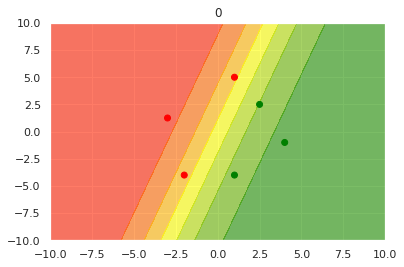

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig,ax = plt.subplots()
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
XX1, XX2 = np.meshgrid(X1,X2)
#X_train = np.asarray([ [2.5,2.5], [4,-1], [1,-4], [-3,1.25], [-2,-4], [1,5] ])
#Y_train = [1,1,1,0,0,0]
def animate(i):
       ax.clear()
       ax.contourf(XX1,XX2,Y_from_plots[i],cmap = cmap1,alpha = 0.6)
       ax.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=cmap1)
       ax.set_title('%d'%(i)) 

interval = 1#in seconds     
anim = animation.FuncAnimation(fig,animate,100,interval=interval*1e+2,blit=False)

#Here we can use this code as a general template to make animations with plots
#The animations are always made of plots in loops
#The catch here is to have lists which contain data of each variable to be plotted of each iteration




In [43]:
HTML(anim.to_html5_video())
#final animation video
#Run the code cells to view the video

#Loading and working with real world data

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [48]:
data2 = pd.read_csv('mobile_cleaned.csv')
#After uploading the file we read it 

In [49]:
data2.head()

,Unnamed: 0,PhoneId,Weight,Internal Memory,Pixel Density,Capacity,Screen to Body Ratio (calculated),Height,Processor_frequency,RAM,Screen Size,Resolution,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,...,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Rating
0,0,0,182,64,403,4000,80.68,157.9,1.8,4,6.26,20,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4.5
1,1,1,168,32,271,4230,80.85,156.2,1.8,3,6.20,8,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.5
2,2,2,168,32,409,3500,83.68,157.0,2.1,3,6.30,25,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.4
3,3,4,169,64,411,3300,74.78,159.8,2.2,4,6.00,24,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.3
4,4,5,175,64,396,3750,84.23,160.4,2.2,4,6.50,16,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.4


In [50]:
X = data2.drop(columns = ['Rating','Unnamed: 0'],axis =1)
#Dropping unnecessary columns from the data set

In [51]:
X.head()

,PhoneId,Weight,Internal Memory,Pixel Density,Capacity,Screen to Body Ratio (calculated),Height,Processor_frequency,RAM,Screen Size,Resolution,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,...,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other
0,0,182,64,403,4000,80.68,157.9,1.8,4,6.26,20,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,168,32,271,4230,80.85,156.2,1.8,3,6.20,8,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,168,32,409,3500,83.68,157.0,2.1,3,6.30,25,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,169,64,411,3300,74.78,159.8,2.2,4,6.00,24,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,175,64,396,3750,84.23,160.4,2.2,4,6.50,16,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
Y = data2['Rating']

In [53]:
threshold = 4.2
data2['Class'] = data2['Rating'].map(lambda x: 0 if x < threshold else 1)
#Making another column with binarised rating values

In [54]:
data2['Class'].value_counts(normalize = True)
#Normalize true takes the fraction of each type of count

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [55]:
Y_binarised = data2['Class'].to_numpy()

##Standardisation of the given data 
Here we'll see splitting the data into train/test and also standardising it such that all values lie b/w 0 and 1

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#We import this package to carry out splitting of the data for training the model and testing 

In [57]:
scalar = StandardScaler()
#The standard scaler used here is to standardise any form of data
#Transformation such that mean = 0 and std =1 
#Done to make data scaled differently as uniform
#Still unclear how this is more appropriate than normalisation

In [58]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,random_state = 0, stratify = Y_binarised)
#Similar to the one done before, splitting data
#Random_state prevents it from being changed everytime the code is run
#Stratify divides it in the proportion of 1s and 0s in Y_binarised

In [59]:
print(X.shape,Y.shape,X_train.shape,Y_train.shape)

(341, 87) (341,) (255, 87) (255,)


In [60]:
X_scaled_train = scalar.fit_transform(X_train)
X_scaled_test = scalar.transform(X_test)
#Very important the parameters for scaling i.e mean and std are decided with X_train
#X_train AND X_test are scaled with the same parameters 
#We ensure we do not do separate 'fit' for X_test

In [61]:
Y_train1= Y_train.to_numpy()
Y_test1 = Y_test.to_numpy()
#Array conversion

In [62]:
scalar2 = MinMaxScaler()
Y_scaled_train1 = scalar2.fit_transform(Y_train1.reshape(-1,1))
Y_scaled_train = Y_scaled_train1.flatten()

#MinMaxScaler will change the range of the data to make it fit b/w 0 and 1, different from Standardisation
#Reshape is done to convert 1D array to 2D, each element is put in a row
#fit_transfrom is used to make Y_scaled_train
#Flatten is used to get an array in 1D format, back conversion

In [63]:
Y_scaled_test1 = scalar2.transform(Y_test1.reshape(-1,1))
Y_scaled_test = Y_scaled_test1.flatten()

#Here again, parameters from training data is used to modify test data without doing fit for test data 
#Reshaping and flattening done to modify array dimensions

In [64]:
scaled_threshold = scalar2.transform(np.asarray([threshold]).reshape(-1,1))[0][0]

#Threshold is also scaled from 4.2 to lie b/w 0 and 1 
#first converted to list, then to 1D array, then to 2D array 
#finally first element 0,0 is taken to return an integer

In [65]:
Y_binarised_train_temp =[]
for y in Y_scaled_train:
  y_temp = 0 if y< scaled_threshold else 1
  Y_binarised_train_temp.append(y_temp)
Y_binarised_train = np.asarray(Y_binarised_train_temp)

#Scaled parameters have to be classified to 0 and 1 based on scaled_threshold
#This is added to a new list converted into an array 
#X_scaled and Y_scaled and Y_binarised train to be used for learning with the model

In [66]:
Y_binarised_test_temp =[]
for y in Y_scaled_test:
  y_temp = 0 if y< scaled_threshold else 1
  Y_binarised_test_temp.append(y_temp)
Y_binarised_test = np.asarray(Y_binarised_test_temp)

#Carrying out learning with the Sigmoid Neuron model and the given data 

In [67]:
sn = SigmoidNeuron()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


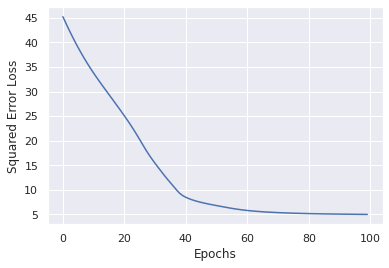

In [68]:
sn.train(X_scaled_train,Y_scaled_train,100,0.01,show_loss=1)

In [69]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

#After writing the predict function, we move on to calcualate the outputs of our trained sigmoid neuron model 
#We calculate the output for the given training data also just for comparison

In [70]:
Y_binarised_train_temp_pred =[]
for y in Y_pred_train:
  y_temp = 0 if y< scaled_threshold else 1
  Y_binarised_train_temp_pred.append(y_temp)
Y_binarised_train_pred = np.asarray(Y_binarised_train_temp_pred)

#Here we binarise the predicted results on the training data, its also done below on the test data
#We binarise it to calcuate accuracy, that is %age of correct predictions

In [71]:
Y_binarised_test_temp_pred =[]
for y in Y_pred_test:
  y_temp = 0 if y< scaled_threshold else 1
  Y_binarised_test_temp_pred.append(y_temp)
Y_binarised_test_pred = np.asarray(Y_binarised_test_temp_pred)

In [75]:
accuracy_train = accuracy_score(Y_binarised_train_pred, Y_binarised_train)
accuracy_test = accuracy_score(Y_binarised_test_pred, Y_binarised_test)
print('Training Accuracy is',accuracy_train)
print('Test Accuracy is',accuracy_test)

#Calculating accuracy with appropriate packages

Training Accuracy is 0.7490196078431373
Test Accuracy is 0.7325581395348837
